In [35]:
# Loading dataset
data <- read.csv("./bank_mkt_train.csv")

In [36]:
summary(data)


   client_id          age            job              marital         
 Min.   :    2   Min.   :17.00   Length:20000       Length:20000      
 1st Qu.:10312   1st Qu.:32.00   Class :character   Class :character  
 Median :20762   Median :38.00   Mode  :character   Mode  :character  
 Mean   :20683   Mean   :40.05                                        
 3rd Qu.:30993   3rd Qu.:47.00                                        
 Max.   :41188   Max.   :98.00                                        
                 NA's   :202                                          
  education           default            housing              loan          
 Length:20000       Length:20000       Length:20000       Length:20000      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                               

#### Splitting Train / Test

In [37]:
set.seed(123)
# Selecting a 70/30 split for train/test
dt = sort(sample(nrow(data), nrow(data)*.7))
train<-data[dt,]
test<-data[-dt,]

#### Handling Null Values

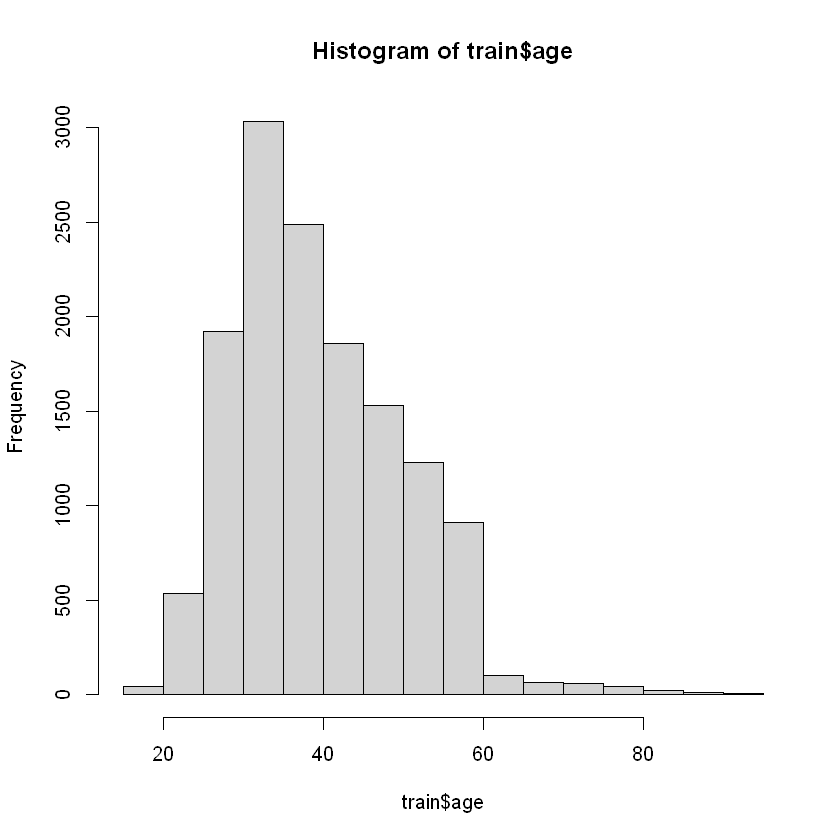

In [38]:
hist(train$age)


In [39]:
mean(train$age ,na.rm = TRUE)

[1] 40.02944

In [40]:
median(train$age, na.rm = TRUE)

[1] 38

In [41]:
# Tracking which obs have null age
train$age_null <-  ifelse(is.na(train$age),1, 0)
test$age_null <-  ifelse(is.na(test$age),1, 0)
data$age_null <-  ifelse(is.na(data$age),1, 0)

In [42]:
# Substituting age per median
train[which(is.na(train$age)),]$age <- median(train$age, na.rm = TRUE)
test[which(is.na(test$age)),]$age <- median(train$age, na.rm = TRUE)
data[which(is.na(data$age)),]$age <- median(data$age, na.rm = TRUE)

In [43]:
install.packages("naniar")
library(naniar)

Warning message:
"package 'naniar' is in use and will not be installed"


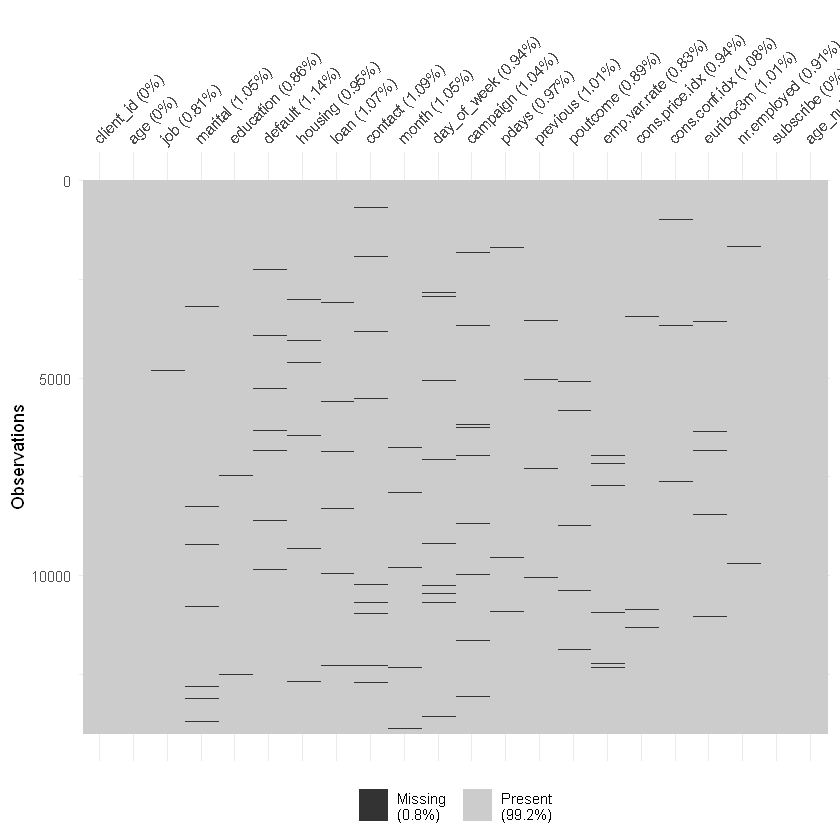

In [44]:
# Visualizing distribution of missing values
vis_miss(train)

In [45]:
# Categorical variable job assigning unknown value to NA 
nrow(train[which(is.na(train$job)),])
train[which(is.na(train$job)),]$job <- "unknown"
test[which(is.na(test$job)),]$job <- "unknown"
data[which(is.na(data$job)),]$job <- "unknown"


[1] 114

In [46]:
nrow(train_no_na)/nrow(train)

ERROR: Error in nrow(train_no_na): object 'train_no_na' not found


In [47]:
train[-is.na(train), ]

,client_id,age,job,marital,education,default,housing,loan,contact,month,⋯,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,age_null
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
2,37529,35,unemployed,married,university.degree,no,yes,no,telephone,jun,⋯,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0,0
4,9642,45,services,married,high.school,no,yes,no,cellular,apr,⋯,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,0,0
5,14183,45,unknown,married,unknown,unknown,unknown,unknown,telephone,may,⋯,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0,0
6,15180,38,technician,married,professional.course,no,no,no,telephone,may,⋯,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0,0
7,27168,33,technician,married,professional.course,no,no,yes,cellular,apr,⋯,NA,1,failure,-1.8,93.075,-47.1,1.405,5099.1,1,0
9,30538,29,blue-collar,single,unknown,no,yes,no,cellular,may,⋯,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,0,0
10,28981,34,admin.,divorced,university.degree,no,yes,yes,cellular,aug,⋯,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0,0
11,7989,47,blue-collar,married,high.school,unknown,yes,no,telephone,jun,⋯,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,0,0
13,24541,30,admin.,married,basic.6y,no,yes,no,cellular,jul,⋯,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0,0


In [48]:
# Categorical variable marital status assigning unknown value to NA 
nrow(train[which(is.na(train$marital)),])
train[which(is.na(train$marital)),]$marital <- "unknown"
test[which(is.na(test$marital)),]$marital <- "unknown"
data[which(is.na(data$marital)),]$marital <- "unknown"


[1] 147

In [49]:
# Categorical variable education assigning unknown value to NA 
nrow(train[which(is.na(train$education)),])
train[which(is.na(train$education)),]$education <- "unknown"
test[which(is.na(test$education)),]$education <- "unknown"
data[which(is.na(data$education)),]$education <- "unknown"


[1] 120

In [50]:
# Categorical variable default assigning unknown value to NA 
nrow(train[which(is.na(train$default)),])
train[which(is.na(train$default)),]$default <- "unknown"
test[which(is.na(test$default)),]$default <- "unknown"
data[which(is.na(data$default)),]$default <- "unknown"


[1] 160

In [51]:
# Categorical variable housing assigning unknown value to NA 
nrow(train[which(is.na(train$housing)),])
train[which(is.na(train$housing)),]$housing <- "unknown"
test[which(is.na(test$housing)),]$housing <- "unknown"
data[which(is.na(data$housing)),]$housing <- "unknown"


[1] 133

In [52]:
# Categorical variable loan assigning unknown value to NA 
nrow(train[which(is.na(train$loan)),])
train[which(is.na(train$loan)),]$loan <- "unknown"
test[which(is.na(test$loan)),]$loan <- "unknown"
data[which(is.na(data$loan)),]$loan <- "unknown"

[1] 150

In [53]:
# Categorical variable contact  assigning missing value to NA 
nrow(train[which(is.na(train$contact)),])
train[which(is.na(train$contact)),]$contact <- "missing"
test[which(is.na(test$contact)),]$contact <- "missing"
data[which(is.na(data$contact)),]$contact <- "missing"

[1] 152

In [54]:
# Tracking null values for month category
train$null_month <- ifelse(is.na(train$month), 1 , 0)
test$null_month <- ifelse(is.na(test$month), 1 , 0)
data$null_month <- ifelse(is.na(data$month), 1 , 0)

In [55]:
# Categorical variable month assigning missing value since there is no record for the contact 
nrow(train[which(is.na(train$day_of_week)),])
train[which(is.na(train$day_of_week)),]$day_of_week <- "missing"
test[which(is.na(test$day_of_week)),]$day_of_week <- "missing"
data[which(is.na(data$day_of_week)),]$day_of_week <- "missing"

[1] 131

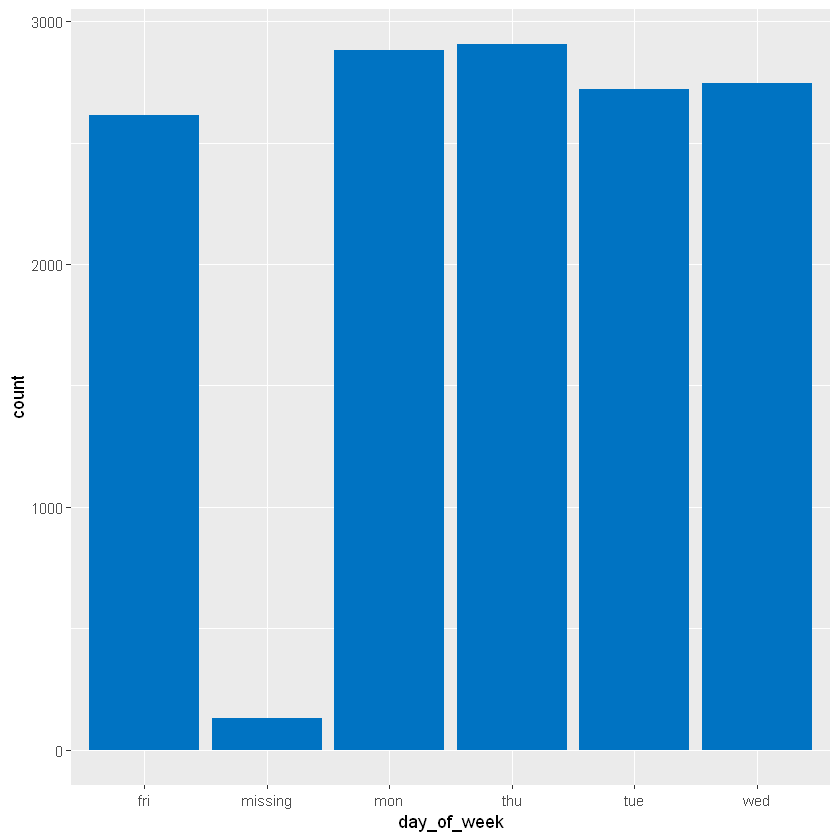

In [56]:
# Day of week
# Checking day distribution
ggplot(train, aes(day_of_week)) +
  geom_bar(fill = "#0073C2FF") 

In [57]:
install.packages("ggplot2")

Warning message:
"package 'ggplot2' is in use and will not be installed"


In [58]:
library(ggplot2)

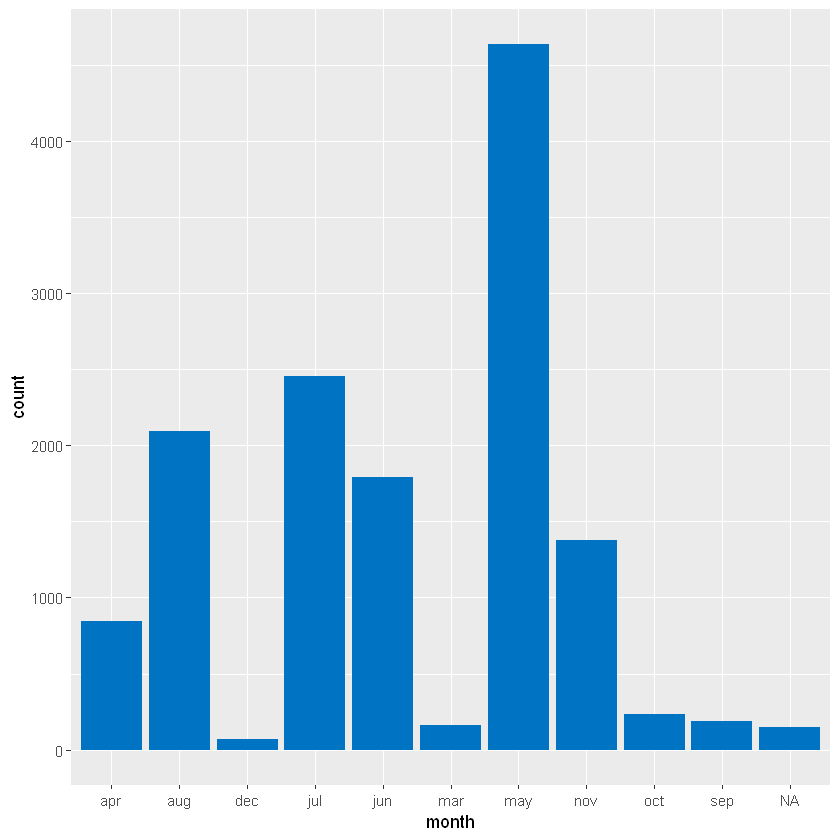

In [59]:
# Checking month distribution
ggplot(train, aes(month)) +
  geom_bar(fill = "#0073C2FF") 

In [60]:
# Replacing null month by mode 
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}
train[is.na(train$month),]$month <- getmode(train$month)
test[is.na(test$month),]$month <- getmode(train$month)
data[is.na(data$month),]$month <- getmode(data$month)

Warning message:
"Removed 145 rows containing non-finite values (stat_count)."


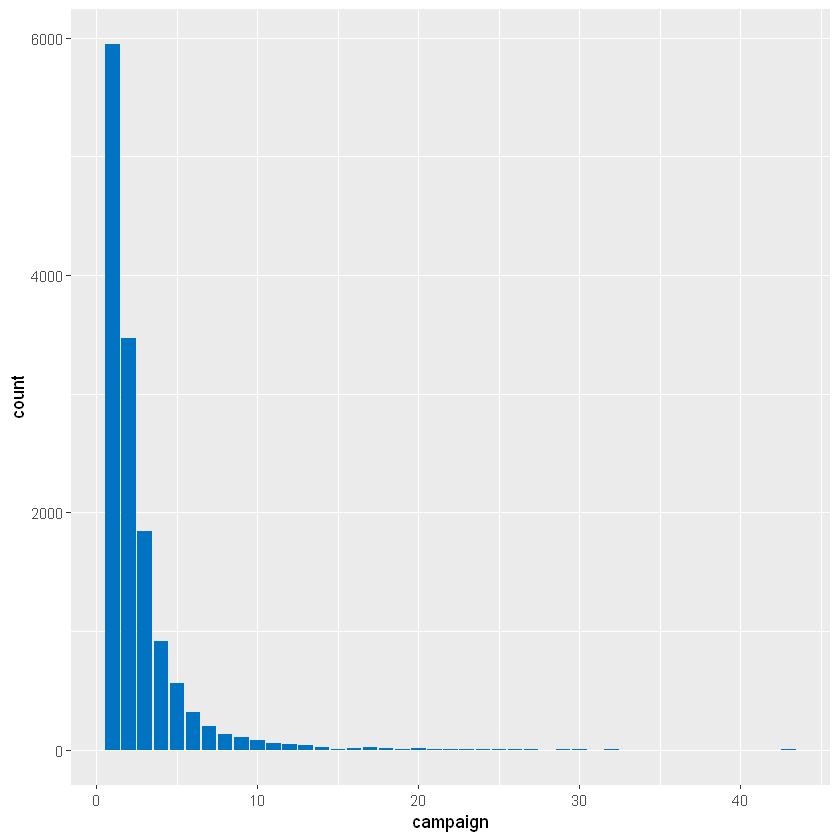

In [61]:
# Handling campaign 
ggplot(train, aes(campaign)) +
  geom_bar(fill = "#0073C2FF") 

In [62]:
# Tracking null values for campaign variable
train$null_campaign <- ifelse(is.na(train$campaign), 1 , 0)
test$null_campaign <- ifelse(is.na(test$campaign), 1 , 0)
data$null_campaign <- ifelse(is.na(data$campaign), 1 , 0)

In [63]:
# Substituting campaign null values for median
train[is.na(train$campaign),]$campaign <- median(train$campaign, na.rm = TRUE)
test[is.na(test$campaign),]$campaign <- median(train$campaign, na.rm = TRUE)
data[is.na(data$campaign),]$campaign <- median(data$campaign, na.rm = TRUE)

In [64]:
# Substituting null values in pdays for 999 which means client has not been contacted. Keeping track of previously null obs
train$null_pdays <- ifelse(is.na(train$pdays), 1 , 0)
test$null_pdays <- ifelse(is.na(test$pdays), 1 , 0)
data$null_pdays <- ifelse(is.na(data$pdays), 1 , 0)

train[is.na(train$pdays),]$pdays <- median(train$pdays, na.rm = TRUE)
test[is.na(test$pdays),]$pdays <- median(train$pdays, na.rm = TRUE)
data[is.na(data$pdays),]$pdays <- median(data$pdays, na.rm = TRUE)


In [65]:
# Substituting null values in previous for 0 which means client has not been contacted. Keeping track of previously null obs
train$null_previous <- ifelse(is.na(train$previous), 1 , 0)
test$null_previous <- ifelse(is.na(test$previous), 1 , 0)
data$null_previous <- ifelse(is.na(data$previous), 1 , 0)

train[is.na(train$previous),]$previous <- median(train$previous, na.rm = TRUE)
test[is.na(test$previous),]$previous <- median(train$previous, na.rm = TRUE)
data[is.na(data$previous),]$previous <- median(data$previous, na.rm = TRUE)

In [66]:
# Categorical variable poutcome assigning unknown value to NA 
nrow(train[which(is.na(train$poutcome)),])
train[which(is.na(train$poutcome)),]$poutcome <- "unknown"
test[which(is.na(test$poutcome)),]$poutcome <- "unknown"
data[which(is.na(data$poutcome)),]$poutcome <- "unknown"

[1] 124

In [67]:
# Tracking null values for emp var rate variable
train$null_emp.var.rate <- ifelse(is.na(train$emp.var.rate), 1 , 0)
test$null_emp.var.rate <- ifelse(is.na(test$emp.var.rate), 1 , 0)
data$null_emp.var.rate <- ifelse(is.na(data$emp.var.rate), 1 , 0)

# Substitutting null values for median
train[is.na(train$emp.var.rate),]$emp.var.rate <- median(train$emp.var.rate, na.rm = TRUE)
test[is.na(test$emp.var.rate),]$emp.var.rate <- median(train$emp.var.rate, na.rm = TRUE)
data[is.na(data$emp.var.rate),]$emp.var.rate <- median(data$emp.var.rate, na.rm = TRUE)

In [68]:
# Tracking null values for cons price idx variable
train$null_cons.price.idx <- ifelse(is.na(train$cons.price.idx), 1 , 0)
test$null_cons.price.idx <- ifelse(is.na(test$cons.price.idx), 1 , 0)
data$null_cons.price.idx <- ifelse(is.na(data$cons.price.idx), 1 , 0)

# Substitutting null values for mean
train[is.na(train$cons.price.idx),]$cons.price.idx <- mean(train$cons.price.idx, na.rm = TRUE)
test[is.na(test$cons.price.idx),]$cons.price.idx <- mean(train$cons.price.idx, na.rm = TRUE)
data[is.na(data$cons.price.idx),]$cons.price.idx <- mean(data$cons.price.idx, na.rm = TRUE)

In [69]:
# Tracking null values for cons conf idx variable
train$null_cons.conf.idx <- ifelse(is.na(train$cons.conf.idx), 1 , 0)
test$null_cons.conf.idx <- ifelse(is.na(test$cons.conf.idx), 1 , 0)
data$null_cons.conf.idx <- ifelse(is.na(data$cons.conf.idx), 1 , 0)

# Substitutting null values for mean
train[is.na(train$cons.conf.idx),]$cons.conf.idx <- mean(train$cons.conf.idx, na.rm = TRUE)
test[is.na(test$cons.conf.idx),]$cons.conf.idx <- mean(train$cons.conf.idx, na.rm = TRUE)
data[is.na(data$cons.conf.idx),]$cons.conf.idx <- mean(data$cons.conf.idx, na.rm = TRUE)

In [70]:
# Tracking null values for cons conf idx variable
train$null_euribor3m <- ifelse(is.na(train$euribor3m), 1 , 0)
test$null_euribor3m <- ifelse(is.na(test$euribor3m), 1 , 0)
data$null_euribor3m <- ifelse(is.na(data$euribor3m), 1 , 0)

# Substitutting null values for mean
train[is.na(train$euribor3m),]$euribor3m <- median(train$euribor3m, na.rm = TRUE)
test[is.na(test$euribor3m),]$euribor3m <- median(test$euribor3m, na.rm = TRUE)
data[is.na(data$euribor3m),]$euribor3m <- median(data$euribor3m, na.rm = TRUE)

In [71]:
# Tracking null values for cons conf idx variable
train$null_nr.employed <- ifelse(is.na(train$nr.employed), 1 , 0)
test$null_nr.employed <- ifelse(is.na(test$nr.employed), 1 , 0)
data$null_nr.employed <- ifelse(is.na(data$nr.employed), 1 , 0)

# Substitutting null values for mean
train[is.na(train$nr.employed),]$nr.employed <- mean(train$nr.employed, na.rm = TRUE)
test[is.na(test$nr.employed),]$nr.employed <- mean(train$nr.employed, na.rm = TRUE)
data[is.na(data$nr.employed),]$nr.employed <- mean(data$nr.employed, na.rm = TRUE)

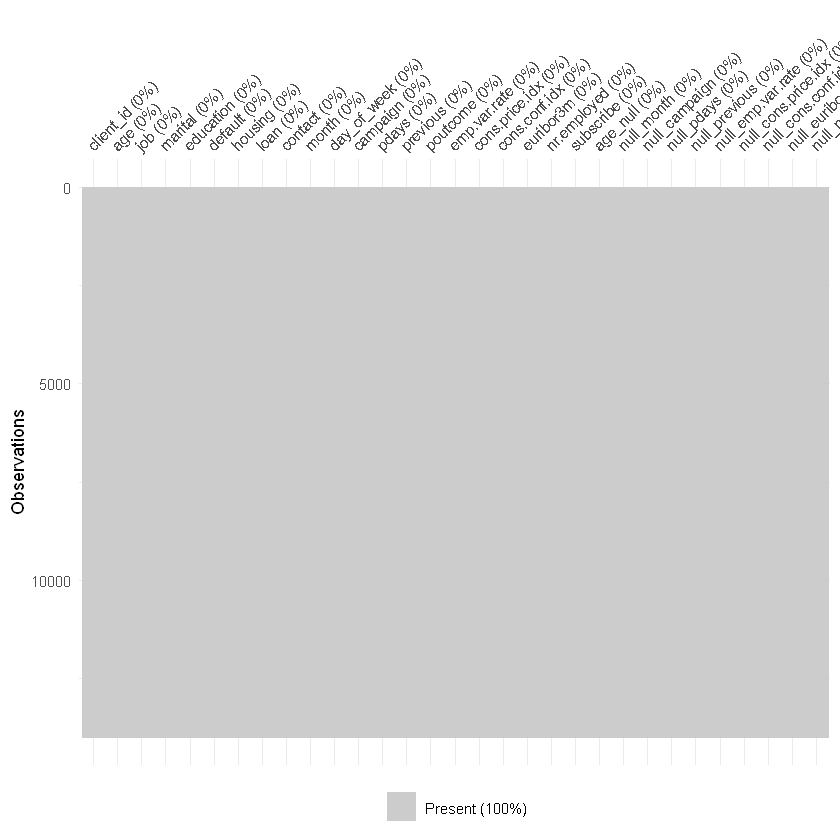

In [72]:
vis_miss(train)

#### Create categories from continuous variables

In [73]:
# P Days changing 999 to -1

train$pdays = ifelse(train$pdays == 999, -1, train$pdays)
test$pdays = ifelse(test$pdays == 999, -1, test$pdays)
data$pdays = ifelse(data$pdays == 999, -1, data$pdays)

In [74]:
str(train)

'data.frame':	14000 obs. of  31 variables:
 $ client_id          : int  29925 37529 9642 14183 15180 27168 30538 28981 7989 24541 ...
 $ age                : int  42 35 45 45 38 33 29 34 47 30 ...
 $ job                : chr  "management" "unemployed" "services" "unknown" ...
 $ marital            : chr  "married" "married" "married" "married" ...
 $ education          : chr  "basic.9y" "university.degree" "high.school" "unknown" ...
 $ default            : chr  "no" "no" "no" "unknown" ...
 $ housing            : chr  "no" "yes" "yes" "unknown" ...
 $ loan               : chr  "no" "no" "no" "unknown" ...
 $ contact            : chr  "cellular" "telephone" "cellular" "telephone" ...
 $ month              : chr  "jul" "jun" "apr" "may" ...
 $ day_of_week        : chr  "thu" "mon" "tue" "wed" ...
 $ campaign           : int  1 4 1 1 2 1 1 1 3 1 ...
 $ pdays              : num  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous           : int  0 0 0 0 0 1 1 0 0 0 ...
 $ poutcome           : 

### Generating dummy variables

In [75]:
install.packages("fastDummies")

package 'fastDummies' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\promaninfante\AppData\Local\Temp\Rtmpem6WFI\downloaded_packages


In [76]:
library(fastDummies)
var_list <- c('job','marital','education','default','housing','loan','contact','month','day_of_week','previous','poutcome')
num_list <- which(names(train) %in% var_list)

train_dummies<-dummy_cols(train[,num_list],remove_first_dummy = TRUE,remove_selected_columns = TRUE)
train_base<-cbind(train[,-num_list],train_dummies)

test_dummies <- dummy_cols(test[,num_list],remove_first_dummy = TRUE,remove_selected_columns = TRUE)
test_base <- cbind(test[,-num_list],test_dummies)

data_dummies <-dummy_cols(data[,num_list],remove_first_dummy = TRUE,remove_selected_columns = TRUE)
data_base <- cbind(data[,-num_list],data_dummies)


In [77]:
test_base$default_yes <- 0

In [78]:
train_base <- train_base[, names(train_base)!="client_id"]
test_base <- test_base[, names(test_base)!="client_id"]
data_base <- data_base[, names(data_base)!="client_id"]

In [79]:
names(train_base)[names(train_base) == "job_blue-collar"]<-"job_bluecollar"
names(train_base)[names(train_base) == "job_self-employed"]<-"job_selfemployed"
names(test_base)[names(test_base) == "job_blue-collar"]<-"job_bluecollar"
names(test_base)[names(test_base) == "job_self-employed"]<-"job_selfemployed"
names(data_base)[names(data_base) == "job_blue-collar"]<-"job_bluecollar"
names(data_base)[names(data_base) == "job_self-employed"]<-"job_selfemployed"

corrplot 0.92 loaded



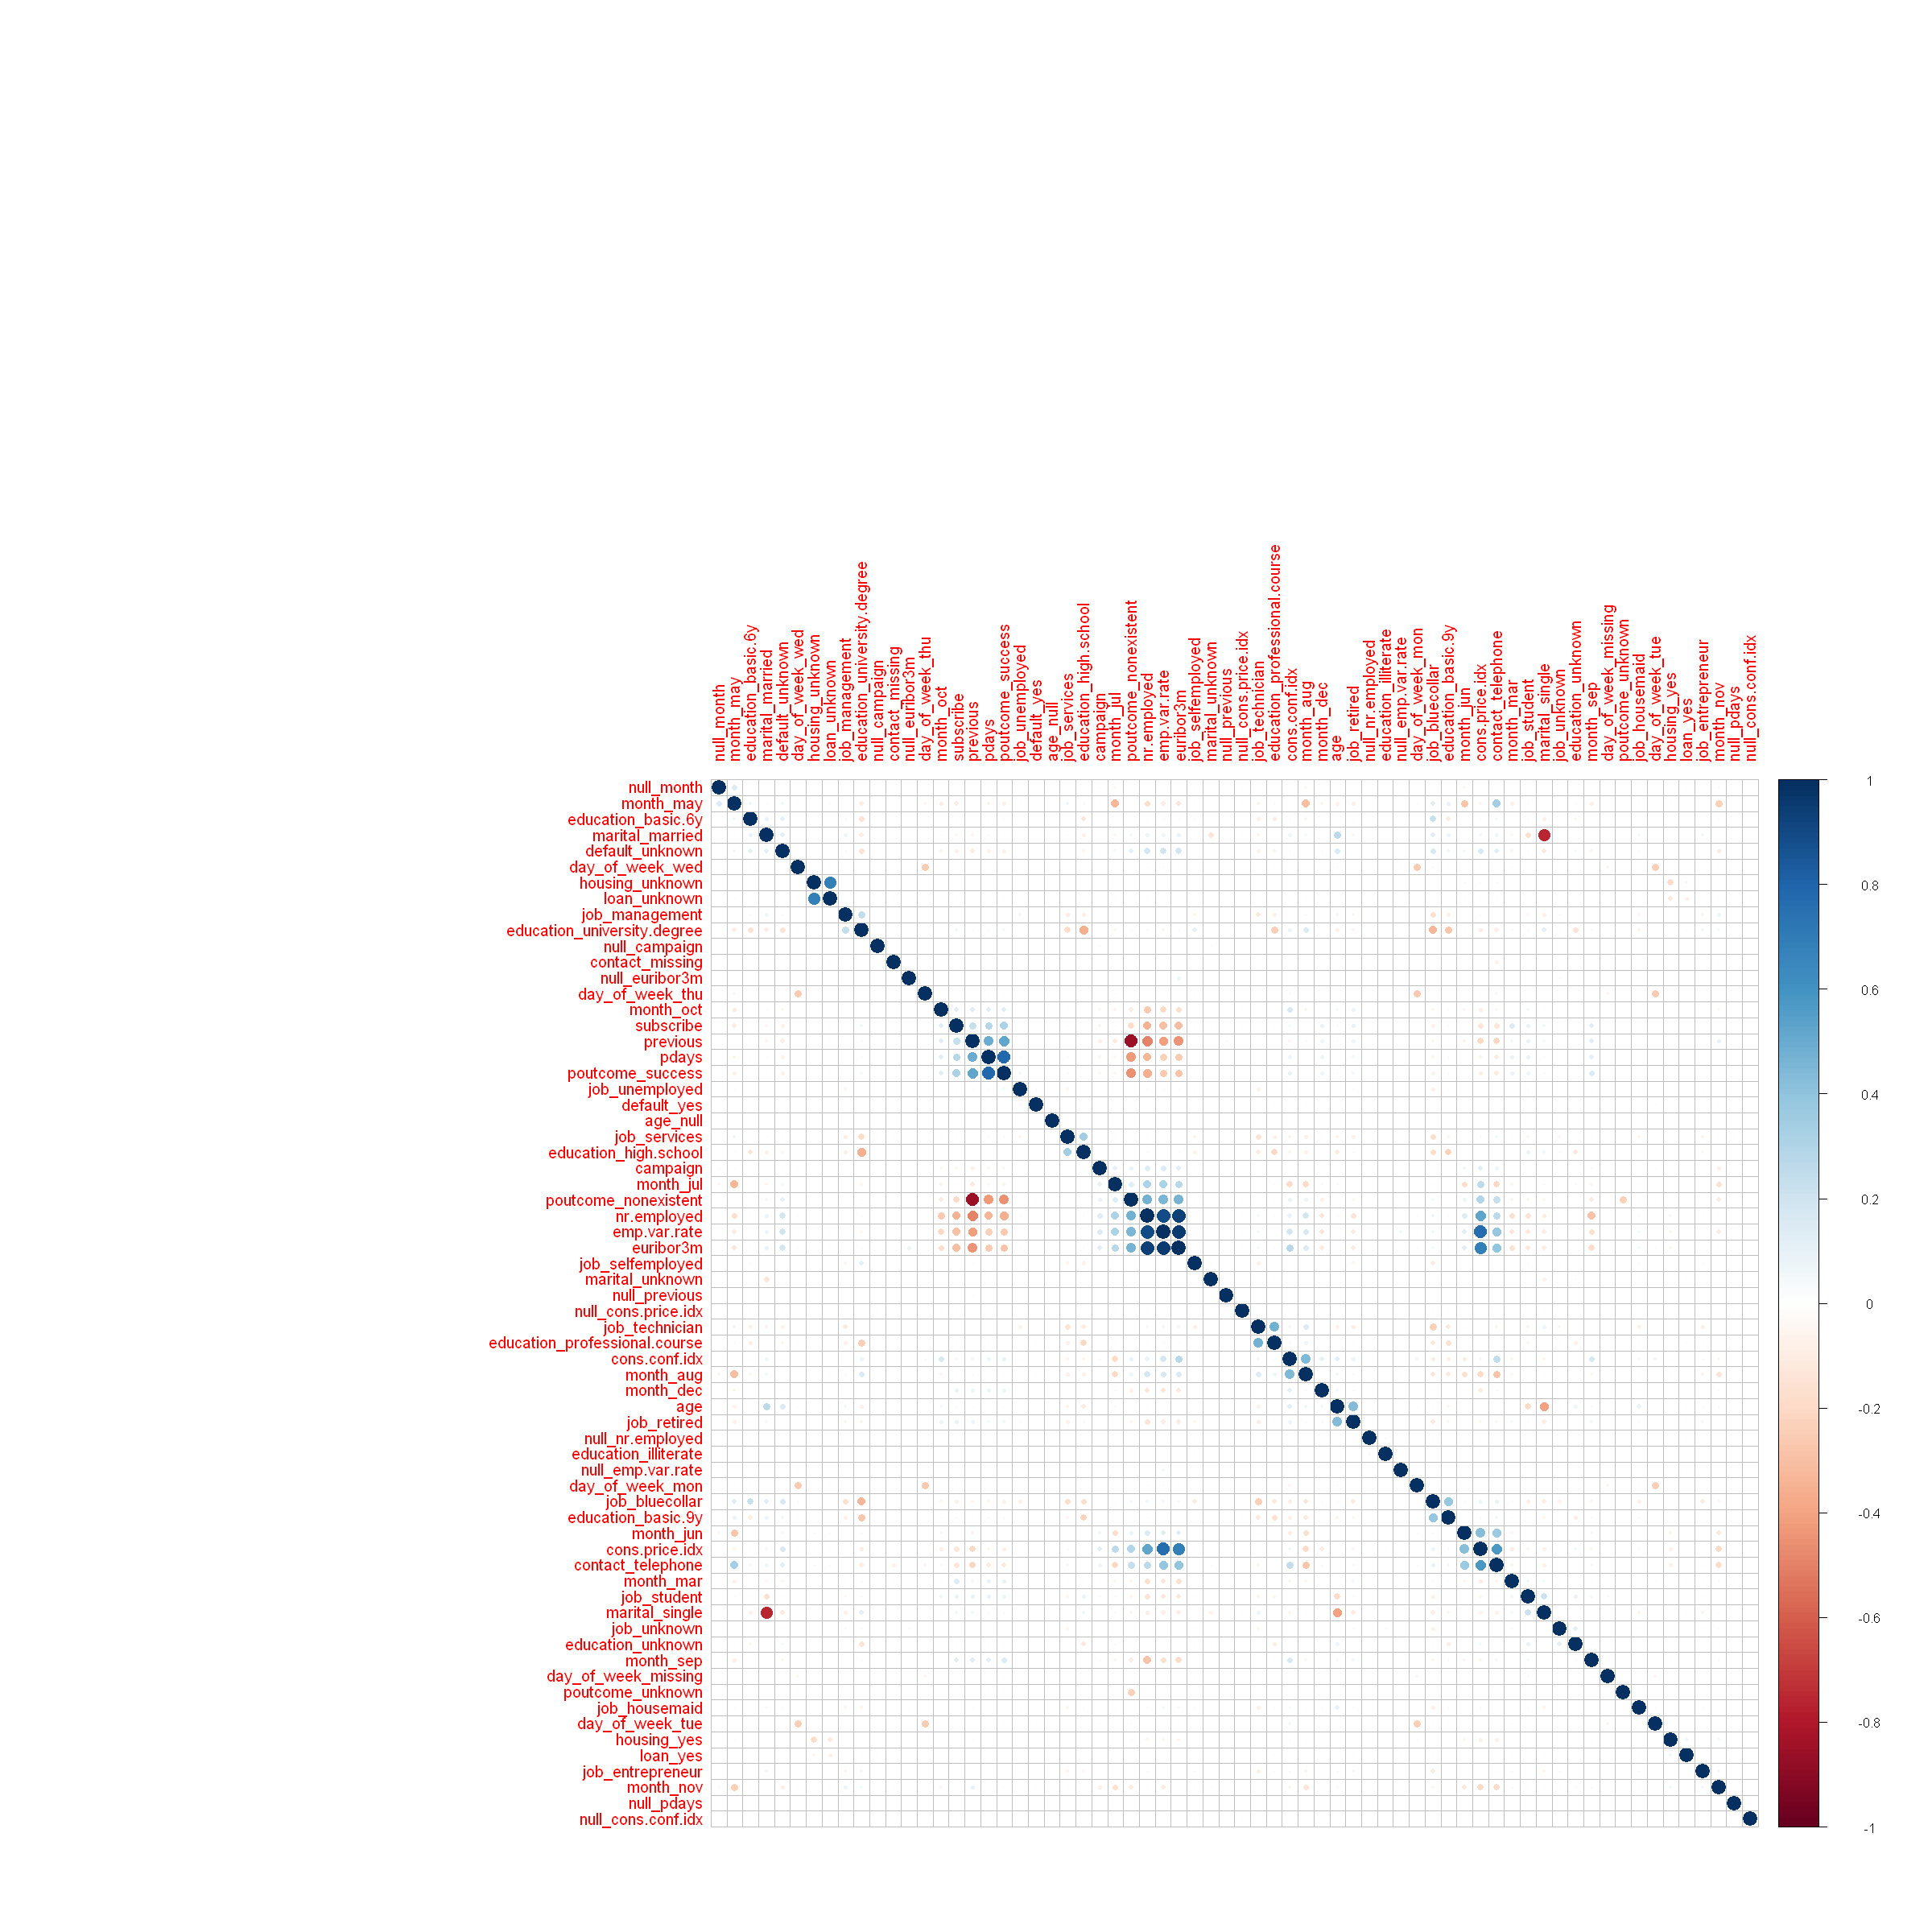

In [80]:
# Correlation matrix of variables
library(corrplot)
cor_train <- cor(train_base)
options(repr.plot.width=20, repr.plot.height=20)

corrplot(cor_train, order = "hclust")

In [81]:
length(names(train_base))

[1] 66

## Models Implementation

### Logistic Regression

In [85]:
bnk_logreg <- glm(subscribe ~ ., data=train_base, family='binomial')
summary(bnk_logreg)



Call:
glm(formula = subscribe ~ ., family = "binomial", data = train_base)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1631  -0.4083  -0.3312  -0.2635   2.8557  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                   -19.213832  28.514082  -0.674  0.50042    
age                             0.004354   0.003557   1.224  0.22094    
campaign                       -0.033935   0.014808  -2.292  0.02193 *  
pdays                           0.042825   0.020861   2.053  0.04008 *  
emp.var.rate                   -0.340287   0.123341  -2.759  0.00580 ** 
cons.price.idx                  0.427690   0.196867   2.172  0.02982 *  
cons.conf.idx                   0.019138   0.009078   2.108  0.03501 *  
euribor3m                      -0.056120   0.110089  -0.510  0.61022    
nr.employed                    -0.004385   0.002296  -1.909  0.05621 .  
age_null                       -0.119205   0.312004  -0.382  0.70

#### Feature Selection

In [86]:
# Creating logistic regression only with highly significant parameters 
final_lr <- glm(subscribe ~emp.var.rate +job_student+job_retired + marital_unknown + contact_telephone + month_mar + month_may + month_jul + month_nov+ poutcome_nonexistent +poutcome_success +day_of_week_mon +education_university.degree + nr.employed + null_month, data= train_base, family = "binomial")

#### Model Evaluation

In [87]:
# Make prediction on both train and test data
pred_train_prob <- predict(final_lr, newdata=train_base, type='response')

In [88]:
pred_test_prob <- predict(final_lr, newdata=test_base, type='response')

In [89]:
# Evaluation model on train
threshold <- 0.5  # Decision threshold
pred_train <- rep(0, length(pred_train_prob))
pred_train[pred_train_prob > threshold] <- 1

# Confusion matrix
print('Confusion matrix:')
table(pred_train, train_base$subscribe)

[1] "Confusion matrix:"


          
pred_train     0     1
         0 12229  1267
         1   161   343

In [90]:
# Accuracy and error rate

In [91]:
acc <- mean(pred_train == train_base$subscribe)

In [92]:
acc

[1] 0.898

In [93]:
err_rate <- 1 - acc
print(paste('Accuracy =', round(acc, 2), '%'))
print(paste('Error =', round(err_rate, 2), '%'))

[1] "Accuracy = 0.9 %"
[1] "Error = 0.1 %"


In [94]:
# AUC
pred_roc <- pROC::roc(as.numeric(pred_train_prob), as.numeric(train_base$subscribe == 1))
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc))

Warning message in roc.default(as.numeric(pred_train_prob), as.numeric(train_base$subscribe == :
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"
Setting levels: control = 0.0172777701439515, case = 0.0218361516389775

Setting direction: controls < cases



[1] "AUC = 0.5"


In [95]:
# Evaluation model on test
threshold <- 0.5  # Decision threshold
pred_test <- rep(0, length(pred_test_prob))
pred_test[pred_test_prob > threshold] <- 1

# Confusion matrix
print('Confusion matrix:')
table(pred_test, test_base$subscribe)

# Accuracy and error rate
acc <- mean(pred_test == test_base$subscribe)
err_rate <- 1 - acc
print(paste('Accuracy =', round(acc, 2), '%'))
print(paste('Error =', round(err_rate, 2), '%'))

# AUC
pred_roc <- pROC::roc(as.numeric(pred_test_prob), as.numeric(test_base$subscribe == 1))
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc))

[1] "Confusion matrix:"


         
pred_test    0    1
        0 5274  507
        1   65  154

[1] "Accuracy = 0.9 %"
[1] "Error = 0.1 %"


Warning message in roc.default(as.numeric(pred_test_prob), as.numeric(test_base$subscribe == :
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"
Setting levels: control = 0.0172777701439515, case = 0.0218361516389775

Setting direction: controls < cases



[1] "AUC = 0.55"


#### Oversampling target = 1

In [96]:
install.packages("imbalance")
library(imbalance)

package 'imbalance' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'imbalance'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\tools\Anaconda3\envs\statml\Lib\R\library\00LOCK\imbalance\libs\x64\imbalance.dll to C:\tools\Anaconda3\envs\statml\Lib\R\library\imbalance\libs\x64\imbalance.dll: Permission denied"
Warning message:
"restored 'imbalance'"



The downloaded binary packages are in
	C:\Users\promaninfante\AppData\Local\Temp\Rtmpem6WFI\downloaded_packages


In [97]:
length(train_base[train_base$subscribe==0,]$subscribe)

[1] 12390

In [98]:
newTrain <- oversample(train_base, ratio = 0.8, method = "RWO", classAttr="subscribe")

In [99]:
# Fitting logistic on oversampled train set

In [108]:
# Creating logistic regression only with highly significant parameters 
final_lr <- glm(subscribe ~emp.var.rate +job_student+job_retired + marital_unknown + contact_telephone + month_mar + month_may + month_jul + month_nov+ poutcome_nonexistent +poutcome_success +day_of_week_mon +education_university.degree + nr.employed + null_month, data= newTrain, family = "binomial")

#### Model Evaluation

In [109]:
# Make prediction on both train and test data
pred_train_prob <- predict(final_lr, newdata=newTrain, type='response')

In [110]:
pred_test_prob <- predict(final_lr, newdata=test_base, type='response')

In [111]:
# Evaluation model on train
threshold <- 0.5  # Decision threshold
pred_train <- rep(0, length(pred_train_prob))
pred_train[pred_train_prob > threshold] <- 1

# Confusion matrix
print('Confusion matrix:')
table(pred_train, newTrain$subscribe)

[1] "Confusion matrix:"


          
pred_train     0     1
         0 10580  2510
         1  1810  7402

In [112]:
# Accuracy and error rate

In [113]:
acc <- mean(pred_train == newTrain$subscribe)

In [114]:
acc

[1] 0.8062954

In [115]:
err_rate <- 1 - acc
print(paste('Accuracy =', round(acc, 2), '%'))
print(paste('Error =', round(err_rate, 2), '%'))

[1] "Accuracy = 0.81 %"
[1] "Error = 0.19 %"


In [116]:
# AUC
pred_roc <- pROC::roc(as.numeric(pred_train_prob), as.numeric(newTrain$subscribe == 1))
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc))

Warning message in roc.default(as.numeric(pred_train_prob), as.numeric(newTrain$subscribe == :
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"
Setting levels: control = 0.0125889412306285, case = 0.0129191914537897

Setting direction: controls < cases



[1] "AUC = 0.5"


In [117]:
# Evaluation model on test
threshold <- 0.5  # Decision threshold
pred_test <- rep(0, length(pred_test_prob))
pred_test[pred_test_prob > threshold] <- 1

# Confusion matrix
print('Confusion matrix:')
table(pred_test, test_base$subscribe)

# Accuracy and error rate
acc <- mean(pred_test == test_base$subscribe)
err_rate <- 1 - acc
print(paste('Accuracy =', round(acc, 2), '%'))
print(paste('Error =', round(err_rate, 2), '%'))

# AUC
pred_roc <- pROC::roc(as.numeric(pred_test_prob), as.numeric(test_base$subscribe == 1))
pred_auc <- pROC::auc(pred_roc)
print(paste('AUC =', pred_auc))

[1] "Confusion matrix:"


         
pred_test    0    1
        0 4524  317
        1  815  344

[1] "Accuracy = 0.81 %"
[1] "Error = 0.19 %"


Warning message in roc.default(as.numeric(pred_test_prob), as.numeric(test_base$subscribe == :
"'response' has more than two levels. Consider setting 'levels' explicitly or using 'multiclass.roc' instead"
Setting levels: control = 0.0125889412306285, case = 0.0148967417891307

Setting direction: controls < cases



[1] "AUC = 0.5"


#### Cross Validation

In [118]:
install.packages("mlr")
library(mlr)

package 'mlr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'mlr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\tools\Anaconda3\envs\statml\Lib\R\library\00LOCK\mlr\libs\x64\mlr.dll to C:\tools\Anaconda3\envs\statml\Lib\R\library\mlr\libs\x64\mlr.dll: Permission denied"
Warning message:
"restored 'mlr'"



The downloaded binary packages are in
	C:\Users\promaninfante\AppData\Local\Temp\Rtmpc7KyEE\downloaded_packages


Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.


Attaching package: 'mlr'


The following object is masked _by_ '.GlobalEnv':

    acc


The following object is masked from 'package:imbalance':

    oversample




In [120]:
names(data_base)[names(data_base) == "job_blue-collar"]<-"job_bluecollar"
names(data_base)[names(data_base) == "job_self-employed"]<-"job_selfemployed"


In [121]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_logreg <- makeLearner("classif.logreg", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_logreg <- makeClassifTask( data=data_base, target="subscribe")

# Run the k-fold CV
resample(lnr_logreg, task_logreg, rdesc, measures=list(mlr::auc))

Resampling: cross-validation

Measures:             auc       

[Resample] iter 1:    0.7834421 

[Resample] iter 2:    0.7787172 

[Resample] iter 3:    0.7737302 

[Resample] iter 4:    0.7304093 

[Resample] iter 5:    0.7893754 

[Resample] iter 6:    0.7495507 

[Resample] iter 7:    0.7889293 

[Resample] iter 8:    0.8383619 

[Resample] iter 9:    0.7907294 

[Resample] iter 10:   0.8073351 




Aggregated Result: auc.test.mean=0.7830581






Resample Result
Task: data_base
Learner: classif.logreg
Aggr perf: auc.test.mean=0.7830581
Runtime: 14.4881

### KNN

In [108]:
require(caret)

Loading required package: caret

Loading required package: lattice



In [109]:
# Get the optimal K for the model - reference: https://rpubs.com/njvijay/16444
set.seed(123)
ctrl <- trainControl(method="repeatedcv", repeats = 3)
knnFit <- train(subscribe ~ ., data = train_base, method = "knn", trControl = ctrl, preProcess = c("center","scale"), tuneLength = 10)
print(knnFit)

Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."


k-Nearest Neighbors 

14000 samples
   65 predictor

Pre-processing: centered (65), scaled (65) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 12600, 12600, 12600, 12600, 12600, 12600, ... 
Resampling results across tuning parameters:

  k   RMSE       Rsquared   MAE      
   5  0.3125238  0.1100406  0.1611516
   7  0.3047603  0.1256624  0.1609964
   9  0.3006103  0.1359546  0.1606804
  11  0.2984148  0.1417226  0.1607847
  13  0.2971589  0.1445340  0.1610478
  15  0.2958129  0.1490896  0.1612104
  17  0.2949710  0.1518703  0.1611693
  19  0.2941756  0.1548288  0.1612808
  21  0.2934838  0.1576569  0.1611068
  23  0.2930142  0.1595749  0.1611186

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 23.


In [115]:
library(class)

set.seed(123)

knn1_pred <- knn(train=newTrain,
                 test=test_base,
                 cl=newTrain$subscribe,
                 k=23)

# Confusion matrix
print('Confusion matrix:')
table(knn1_pred, test_base$subscribe)

# Accuracy
acc <- mean(knn1_pred == test_base$subscribe)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] "Confusion matrix:"


         
knn1_pred    0    1
        0 5212  476
        1  127  185

[1] "Accuracy = 0.9 %"


In [123]:
nrow(test_base)

[1] 6000

In [121]:
print(paste('AUC ='))
pred_roc_knn <- pROC::roc(as.numeric(test_base$subscribe == 1), as.numeric(knn1_pred))
pred_auc <- pROC::auc(pred_roc_knn)
print(paste('AUC =', pred_auc))

[1] "AUC ="


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.628045872591688"


#### Cross Validation for KNN

In [118]:
require(mlr)

Loading required package: mlr

Loading required package: ParamHelpers

Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.


Attaching package: 'mlr'


The following object is masked _by_ '.GlobalEnv':

    acc


The following object is masked from 'package:caret':

    train


The following object is masked from 'package:imbalance':

    oversample




In [119]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_knn <- makeLearner("classif.kknn", predict.type="prob", fix.factors.prediction=T, k=23)

# Define the task
task_logreg <- makeClassifTask(data=newTrain, target="subscribe")

# Run the k-fold CV
resample(lnr_knn, task_logreg, rdesc, measures=list(mlr::auc))

Loading required package: kknn


Attaching package: 'kknn'


The following object is masked from 'package:caret':

    contr.dummy


Resampling: cross-validation

Measures:             auc       

[Resample] iter 1:    0.9379358 

[Resample] iter 2:    0.9439861 

[Resample] iter 3:    0.9332490 

[Resample] iter 4:    0.9404581 

[Resample] iter 5:    0.9418622 

[Resample] iter 6:    0.9353375 

[Resample] iter 7:    0.9467785 

[Resample] iter 8:    0.9397486 

[Resample] iter 9:    0.9411750 

[Resample] iter 10:   0.9370709 




Aggregated Result: auc.test.mean=0.9397602






Resample Result
Task: newTrain
Learner: classif.kknn
Aggr perf: auc.test.mean=0.9397602
Runtime: 50.4549

### Decision Trees

In [122]:
install.packages("tree")
library(tree)

package 'tree' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tree'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\tools\Anaconda3\envs\statml\Lib\R\library\00LOCK\tree\libs\x64\tree.dll to C:\tools\Anaconda3\envs\statml\Lib\R\library\tree\libs\x64\tree.dll: Permission denied"
Warning message:
"restored 'tree'"



The downloaded binary packages are in
	C:\Users\promaninfante\AppData\Local\Temp\Rtmpem6WFI\downloaded_packages


In [123]:
# Fitting a basic tree with all variables
tree_simple <- tree(as.factor(subscribe) ~ .  , data=newTrain)

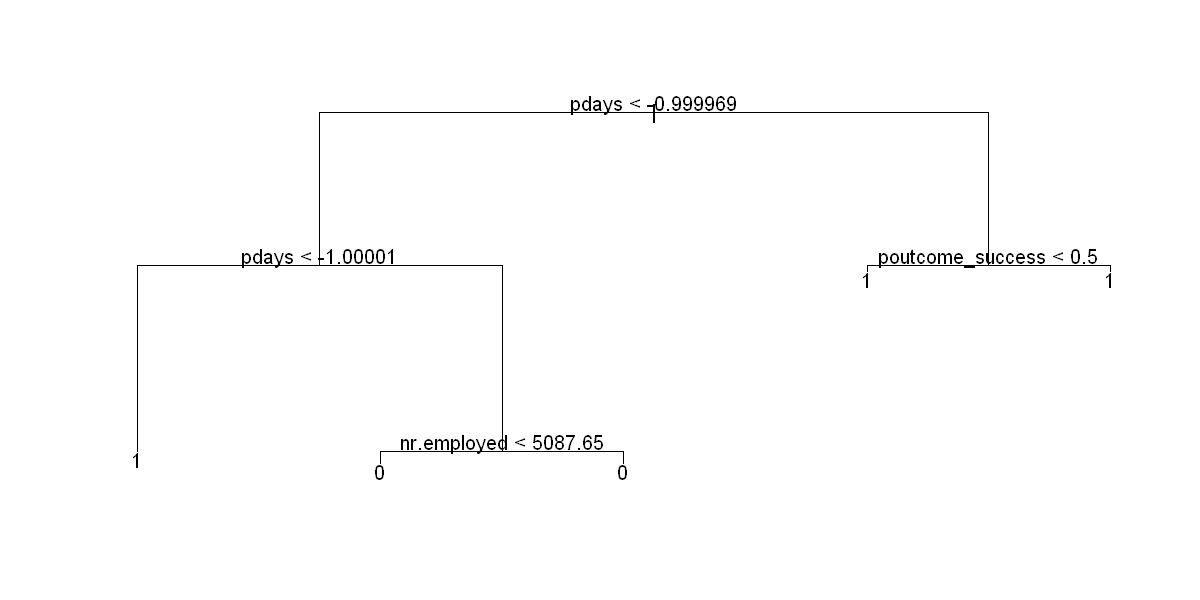

In [124]:
# Plot the tree
options(repr.plot.width=10, repr.plot.height=5)
par(cex.lab=0.8, cex.axis=0.8, cex.main=0.8, cex.sub=0.8)
plot(tree_simple)  # Plot the tree
text(tree_simple, pretty=1)  # Add text

In [896]:
install.packages("party")
library(tidyverse)
library(caret)
library(rpart)


package 'party' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\promaninfante\AppData\Local\Temp\RtmpkfFNka\downloaded_packages


In [897]:
tree.c = train(form = as.factor(subscribe) ~ ., data = newTrain, method = 'ctree')
tree.c

Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."


Conditional Inference Tree 

22302 samples
   65 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 22302, 22302, 22302, 22302, 22302, 22302, ... 
Resampling results across tuning parameters:

  mincriterion  RMSE       Rsquared   MAE      
  0.01          0.2750865  0.6963578  0.1271104
  0.50          0.2719633  0.7022284  0.1283065
  0.99          0.2728175  0.6988957  0.1378768

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mincriterion = 0.5.

In [954]:
set.seed(123)
tree_2 <- train(
as.factor(subscribe) ~., data = newTrain, method = "ctree",
trControl = trainControl("cv", number = 10),
tuneGrid = expand.grid(mincriterion = 0.50)
)

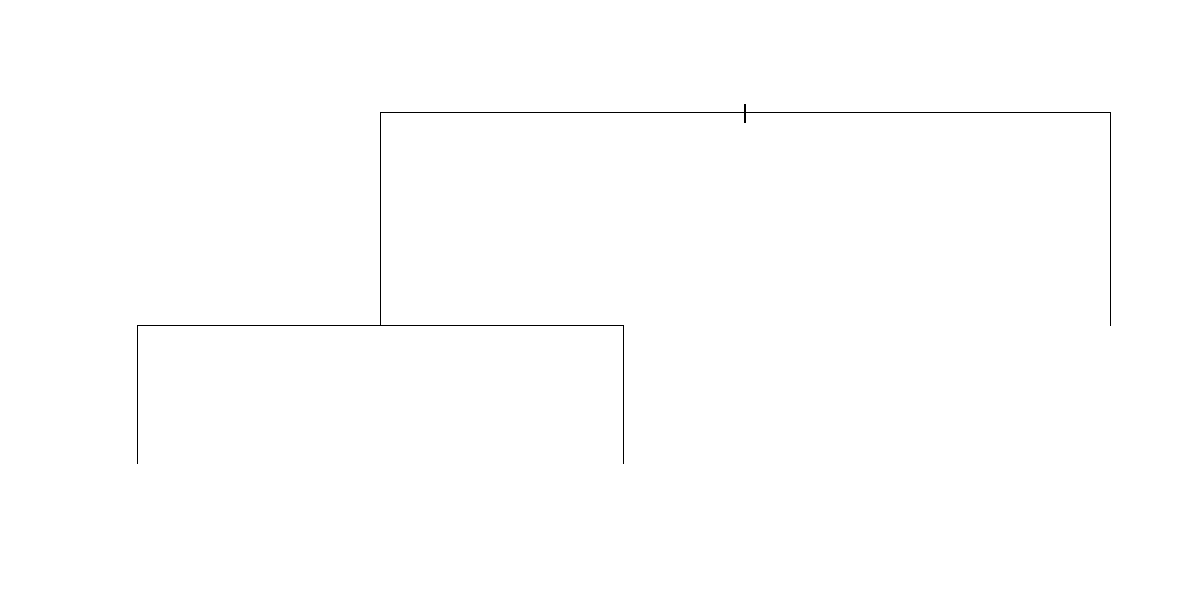

In [952]:
plot(tree_2$finalModel)

#### Evaluation

In [936]:
# Make the prediction
set.seed(2) 
pred <- predict(tree_simple, newdata= test_base)

In [937]:
length(pred[,2])

[1] 6000

In [942]:

threshold <- 0.5  # Decision threshold
pred_test <- rep(0, length(pred[,2]))
pred_test[pred[,2] > threshold] <- 1
# Evaluation: confusion matrix
table(pred_test, test_base$subscribe)

# # Accuracy
print(paste0('Accuracy = ', mean(pred_test == test_base$subscribe)))

# # AUC
print(paste0('AUC = ', pROC::auc(pROC::roc(test_base$subscribe, pred_test))))

         
pred_test    0    1
        0 5252  508
        1   87  153

[1] "Accuracy = 0.900833333333333"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.607586143580237"


In [948]:
pred_test = predict(tree_2, test_base)
# Evaluation: confusion matrix
table(pred_test, test_base$subscribe)

# # Accuracy
print(paste0('Accuracy = ', mean(pred_test == test_base$subscribe)))

# # AUC
print(paste0('AUC = ', pROC::auc(pROC::roc(test_base$subscribe, as.numeric(pred_test)))))

         
pred_test    0    1
        0 5000  435
        1  339  226

[1] "Accuracy = 0.871"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.639205583099727"


### Random Forest

In [127]:
install.packages("randomForest")
library(randomForest)

Warning message:
"package 'randomForest' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"
randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin




In [128]:

set.seed(123)
md_rf <- randomForest(subscribe ~ ., mtry=10, ntree=100, maxnodes=10, data=newTrain, importance=T)  
md_rf

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"



Call:
 randomForest(formula = subscribe ~ ., data = newTrain, mtry = 10,      ntree = 100, maxnodes = 10, importance = T) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 10

          Mean of squared residuals: 0.06112189
                    % Var explained: 75.25

In [130]:
names(newTrain)

[1] "age"                           "campaign"                     
 [3] "pdays"                         "emp.var.rate"                 
 [5] "cons.price.idx"                "cons.conf.idx"                
 [7] "euribor3m"                     "nr.employed"                  
 [9] "subscribe"                     "age_null"                     
[11] "null_month"                    "null_campaign"                
[13] "null_pdays"                    "null_previous"                
[15] "null_emp.var.rate"             "null_cons.price.idx"          
[17] "null_cons.conf.idx"            "null_euribor3m"               
[19] "null_nr.employed"              "previous"                     
[21] "job_bluecollar"                "job_entrepreneur"             
[23] "job_housemaid"                 "job_management"               
[25] "job_retired"                   "job_selfemployed"             
[27] "job_services"                  "job_student"                  
[29] "job_technician"                "job_unemployed"               
[31] "job_unknown"                   "marital_married"              
[33] "marital_single"                "marital_unknown"              
[35] "education_basic.6y"            "education_basic.9y"           
[37] "education_high.school"         "education_illiterate"         
[39] "education_professional.course" "education_university.degree"  
[41] "education_unknown"             "default_unknown"              
[43] "default_yes"                   "housing_unknown"              
[45] "housing_yes"                   "loan_unknown"                 
[47] "loan_yes"                      "contact_missing"              
[49] "contact_telephone"             "month_aug"                    
[51] "month_dec"                     "month_jul"                    
[53] "month_jun"                     "month_mar"                    
[55] "month_may"                     "month_nov"                    
[57] "month_oct"                     "month_sep"                    
[59] "day_of_week_missing"           "day_of_week_mon"              
[61] "day_of_week_thu"               "day_of_week_tue"              
[63] "day_of_week_wed"               "poutcome_nonexistent"         
[65] "poutcome_success"              "poutcome_unknown"

In [131]:
# Make prediction
pred_rf <- predict(md_rf, newdata=test_base)

# Evaluation: MSE
mean((pred_rf - test$medv) ^ 2)
importance(md_rf)

[1] NaN

,%IncMSE,IncNodePurity
age,1.562838,2.98842195
campaign,2.042131,22.48528692
pdays,6.168798,529.88953277
emp.var.rate,2.304703,27.63816697
cons.price.idx,2.124388,11.83655500
cons.conf.idx,2.558759,12.76686386
euribor3m,2.856104,46.91196022
nr.employed,3.255771,128.44230162
age_null,3.684558,151.49165348
null_month,4.829141,261.01723539


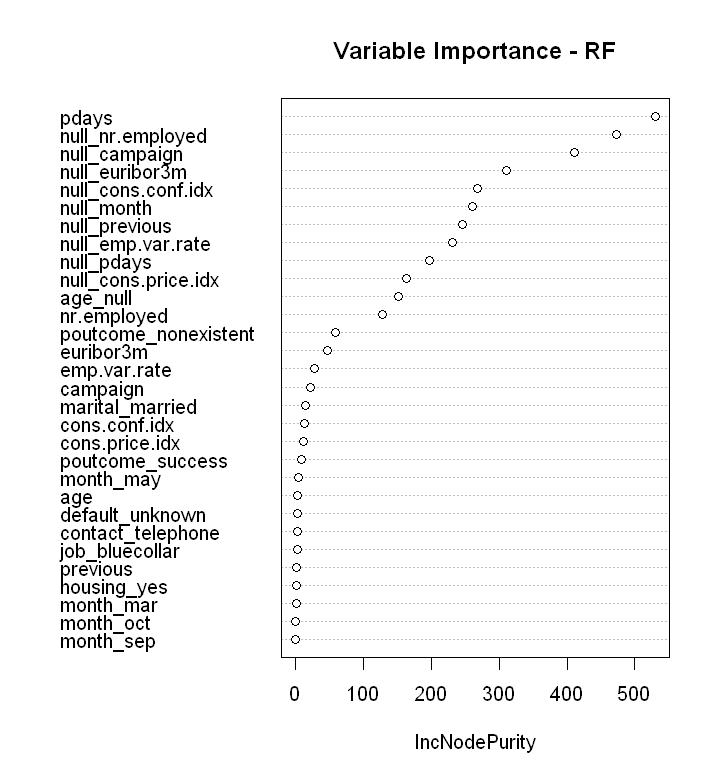

In [132]:
# Plot feature importance
options(repr.plot.width=6, repr.plot.height=6.5)
varImpPlot(md_rf, type=2, main='Variable Importance - RF')

In [137]:
# Fittint RF again only with high importance variables
rf_final <- randomForest(subscribe ~ pdays + null_nr.employed + null_campaign + null_euribor3m  + null_cons.conf.idx+null_month+ null_previous+ null_emp.var.rate+ null_pdays + null_cons.price.idx + age_null + nr.employed, mtry=10, ntree=200, data=newTrain, importance=T)  


Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"


#### Evaluation Metrics

In [138]:
# Make prediction on test
pred_2_test <- predict(rf_final, newdata=test_base)

In [140]:

threshold <- 0.5  # Decision threshold
pred_test <- rep(0, length(pred_2_test))
pred_test[pred_2_test > threshold] <- 1

In [125]:
# Accuracy
print(paste0('Accuracy = ', mean(pred_test == test_base$subscribe)))

# AUC
pred_roc <- pROC::roc( as.numeric(test_base$subscribe == 1), as.numeric(pred_test))
pred_auc_rf <- pROC::auc(pred_roc)

print(paste('AUC =', pred_auc_rf))

[1] "Accuracy = 0.900833333333333"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.607586143580237"


### Gradient Boosting

In [83]:
require(gbm)

Loading required package: gbm

Loaded gbm 2.1.8



,var,rel.inf
,<chr>,<dbl>
pdays,pdays,94.692778515
nr.employed,nr.employed,2.071940448
null_nr.employed,null_nr.employed,0.999562093
null_euribor3m,null_euribor3m,0.461903839
cons.conf.idx,cons.conf.idx,0.252412268
null_campaign,null_campaign,0.237668454
poutcome_success,poutcome_success,0.236683616
euribor3m,euribor3m,0.231502643
null_pdays,null_pdays,0.150340410


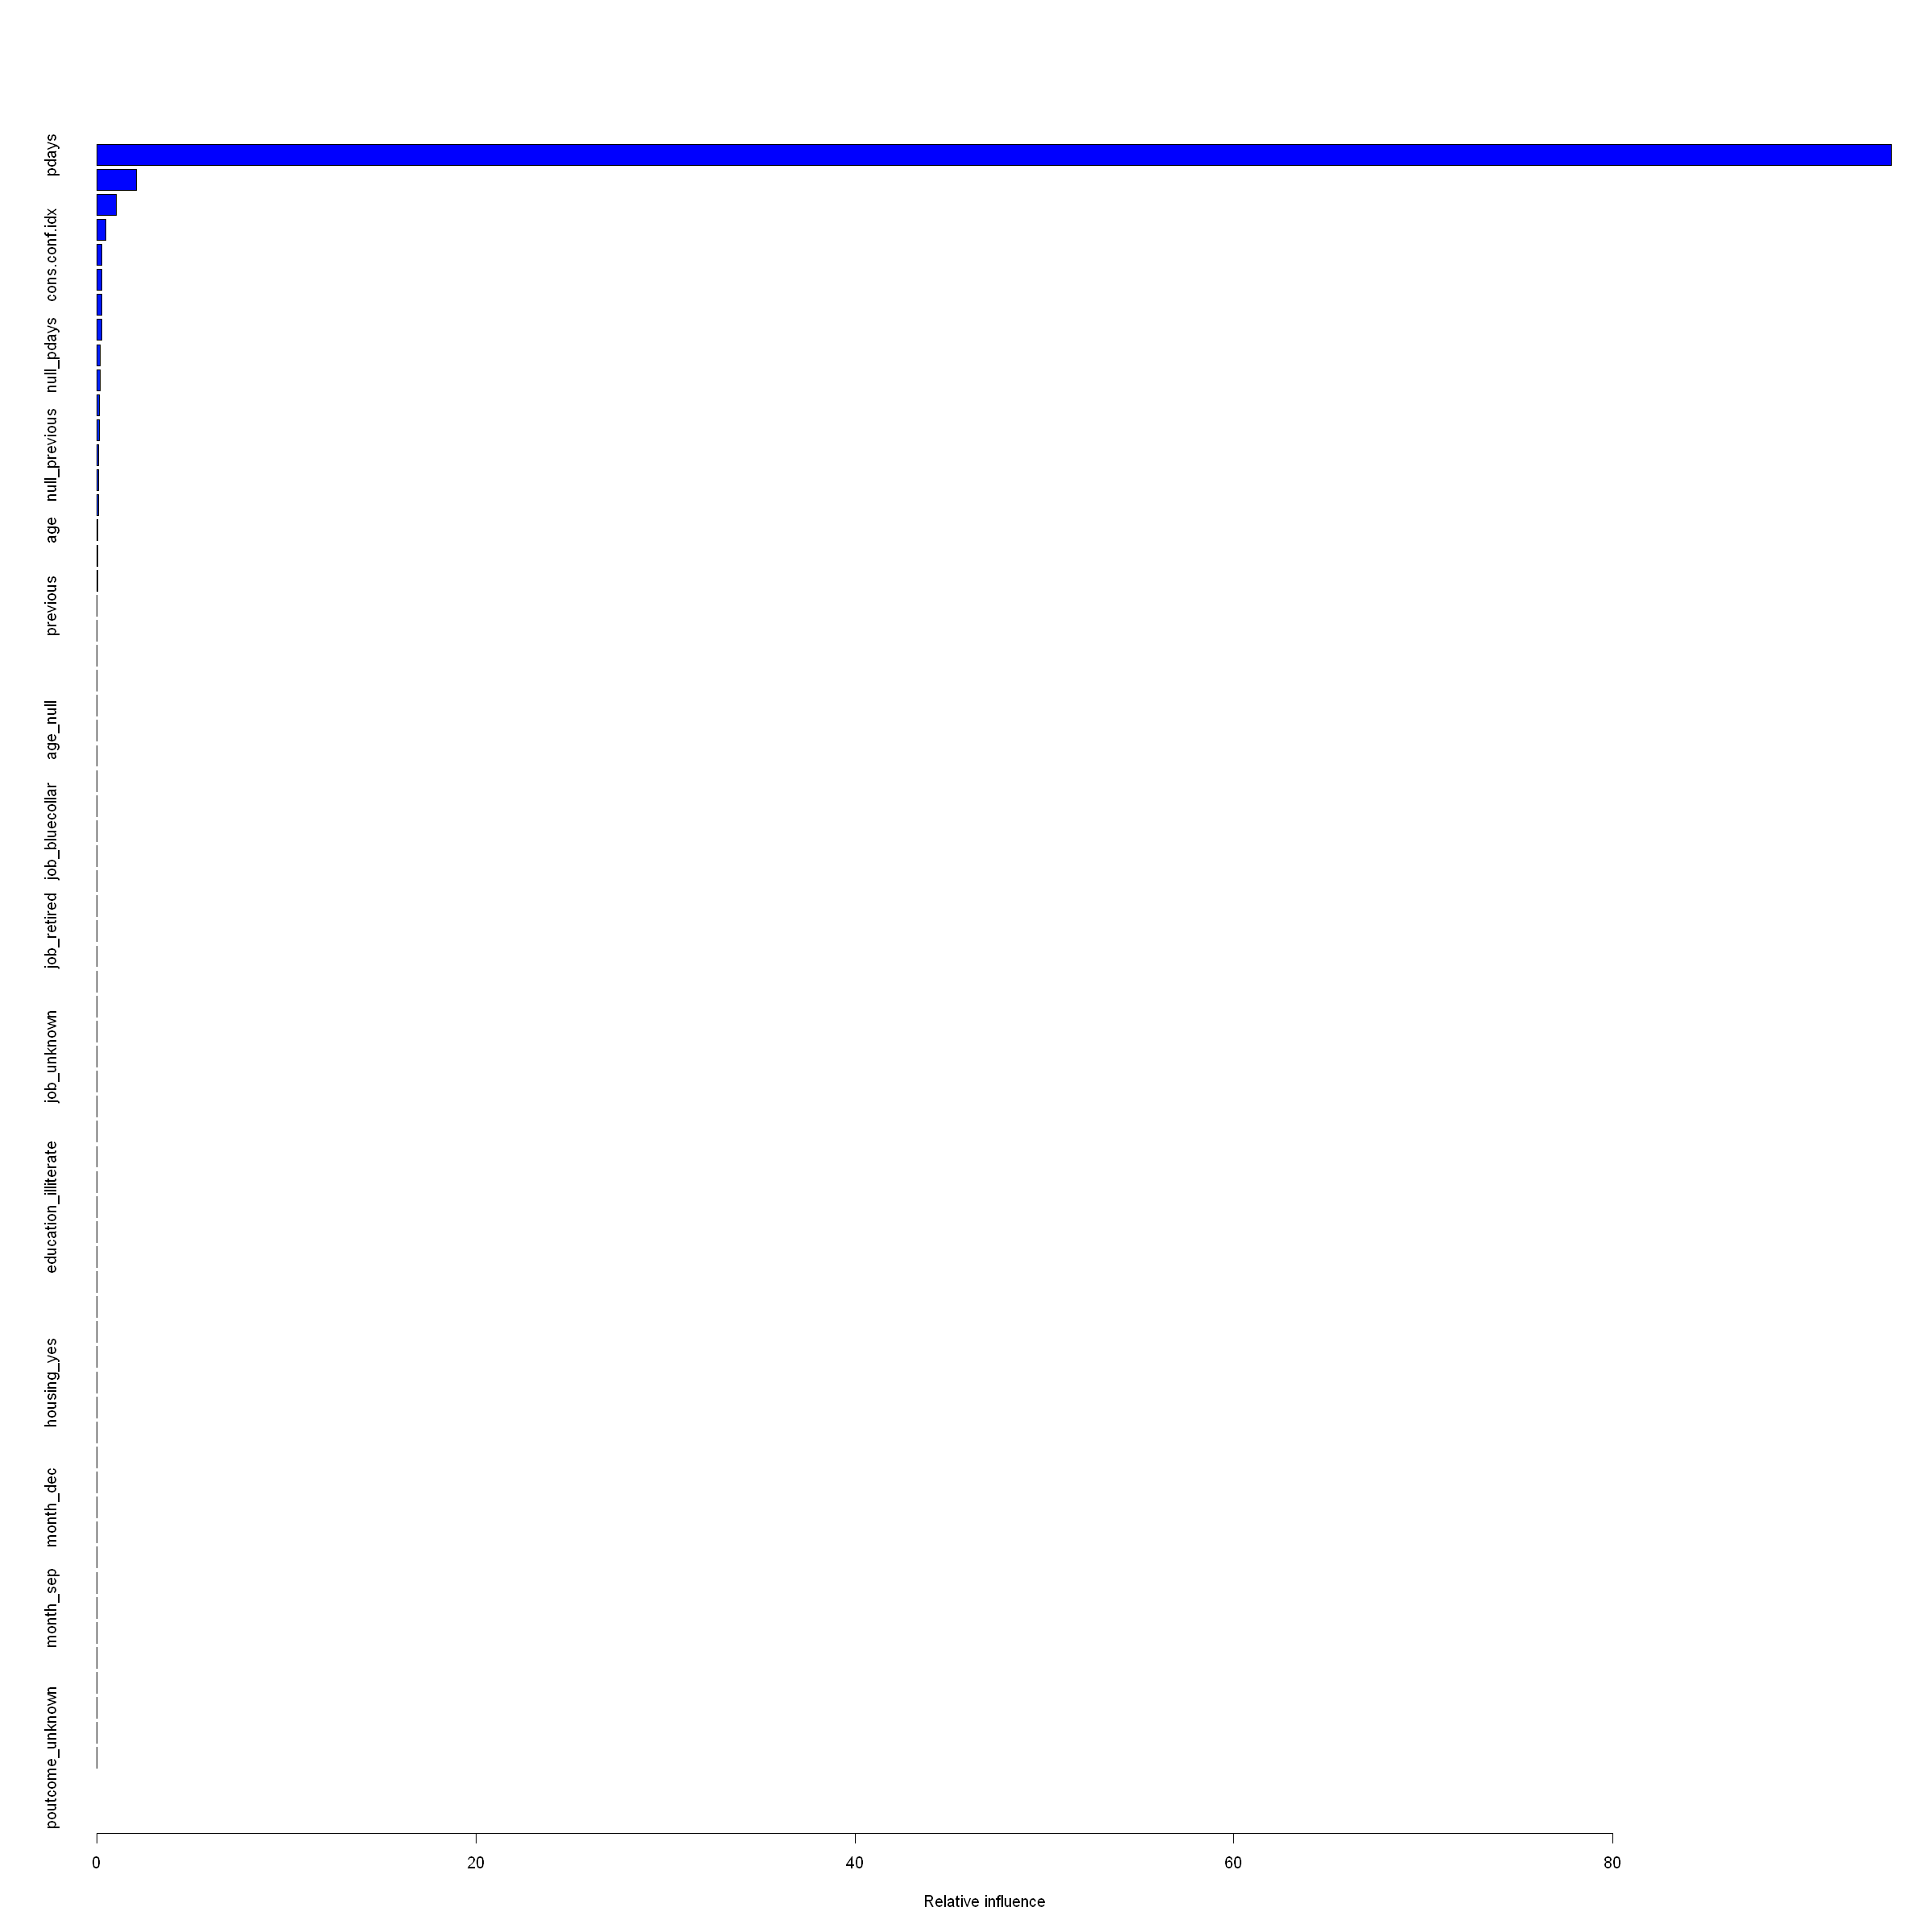

In [100]:
grad_boost <- gbm(subscribe ~ . ,data = newTrain,distribution = "gaussian",n.trees = 200,
                  shrinkage = 0.01, interaction.depth = 4)


summary(grad_boost) #Summary gives a table of Variable Importance and a plot of Variable Importance


,var,rel.inf
,<chr>,<dbl>
null_nr.employed,null_nr.employed,52.2589919
null_euribor3m,null_euribor3m,21.4619334
null_campaign,null_campaign,14.3208797
null_pdays,null_pdays,4.5166853
euribor3m,euribor3m,3.5879316
poutcome_success,poutcome_success,1.7715136
null_cons.price.idx,null_cons.price.idx,1.0250047
emp.var.rate,emp.var.rate,0.6959259
cons.conf.idx,cons.conf.idx,0.2148819


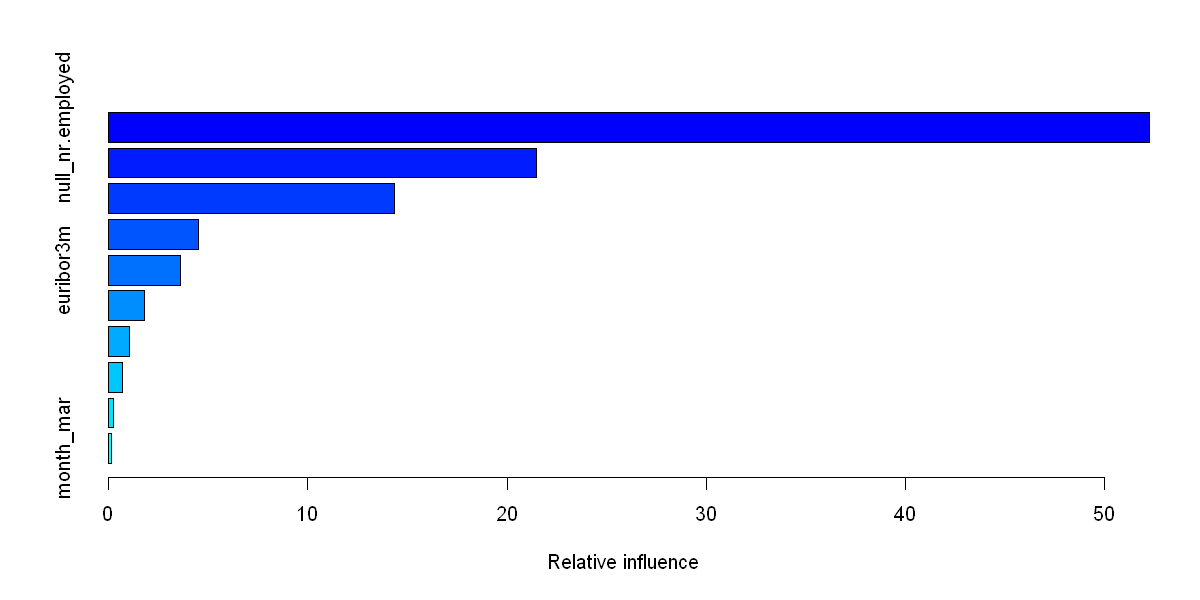

In [128]:
grad_boost_final <- gbm(subscribe ~ null_nr.employed+null_euribor3m+cons.conf.idx+null_campaign+poutcome_success+euribor3m+null_pdays+null_cons.price.idx+month_mar+emp.var.rate ,data = newTrain,distribution = "gaussian",n.trees = 200,
                  shrinkage = 0.01, interaction.depth = 4)


summary(grad_boost_final) #Summary gives a table of Variable Importance and a plot of Variable Importance


In [129]:
gbm_pred_final <- predict(grad_boost_final, test_base, n.trees=200)

In [132]:

threshold <- 0.5  # Decision threshold
pred_test <- rep(0, length(gbm_pred))
pred_test[gbm_pred > threshold] <- 1

# Accuracy
print(paste0('Accuracy = ', mean(pred_test == test_base$subscribe)))

# AUC
pred_roc <- pROC::roc(predictor = as.numeric(pred_test), response = as.numeric(test_base$subscribe == 1))
pred_auc_rf <- pROC::auc(pred_roc)

print(paste('AUC =', pred_auc_rf))

[1] "Accuracy = 0.900833333333333"


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC = 0.607586143580237"


#### Exporting train and test to csv

In [135]:
install.packages("writexl")

package 'writexl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\promaninfante\AppData\Local\Temp\Rtmpem6WFI\downloaded_packages


In [136]:
require(writexl)
# Exporting the train and test sets
write_xlsx(newTrain,"C:/Users/promaninfante/OneDrive - IESEG/StatsML/Individual Assignment/train.xlsx")
write_xlsx(test_base,"C:/Users/promaninfante/OneDrive - IESEG/StatsML/Individual Assignment/test.xlsx")

Loading required package: writexl

